In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns
from scipy import stats
import datetime
sns.set()

In [2]:
def makeTimestamp(x):
    return x.timestamp()

In [13]:
# Load in the counties 
can = pd.read_csv('Airport-Data/can.csv')
atlCounties = pd.read_csv('Airport-Data/atl.csv')
jfkCounties = pd.read_csv('Airport-Data/jfk.csv')
lgaCounties = pd.read_csv('Airport-Data/lga.csv')
seaCounties = pd.read_csv('Airport-Data/sea.csv')
laxCounties = pd.read_csv('Airport-Data/lax.csv')

# Load in original airport data
airports = pd.read_csv('Archieved-Data/airport_traffic_NA.csv', parse_dates = [1], index_col=0)

,Date,AirportName,PercentOfBaseline,City,State,Country,lat,long
0,2020-05-06,Los Angeles International,66,Los Angeles,California,United States of America (the),33.941369,-118.404993
1,2020-07-04,Los Angeles International,36,Los Angeles,California,United States of America (the),33.941369,-118.404993
2,2020-09-24,Los Angeles International,78,Los Angeles,California,United States of America (the),33.941369,-118.404993
3,2020-10-05,Los Angeles International,78,Los Angeles,California,United States of America (the),33.941369,-118.404993
4,2020-07-30,Los Angeles International,70,Los Angeles,California,United States of America (the),33.941369,-118.404993
5,2020-04-07,Los Angeles International,59,Los Angeles,California,United States of America (the),33.941369,-118.404993
6,2020-07-14,Los Angeles International,79,Los Angeles,California,United States of America (the),33.941369,-118.404993
7,2020-09-15,Los Angeles International,83,Los Angeles,California,United States of America (the),33.941369,-118.404993
8,2020-09-23,Los Angeles International,78,Los Angeles,California,United States of America (the),33.941369,-118.404993
9,2020-05-18,Los Angeles International,60,Los Angeles,California,United States of America (the),33.941369,-118.404993


In [14]:
# Associate Canadian provinces with its respective airport records
listCanAirports = can["airport"].unique()
canAirports = airports[airports["AirportName"].isin(listCanAirports)]
canAirports = canAirports.sort_values(by = ['AirportName', 'Date'])

yvr = canAirports[canAirports["AirportName"] == "Vancouver International"].reset_index(drop = True)
yeg = canAirports[canAirports["AirportName"] == "Calgary International"].reset_index(drop = True)
yyz = canAirports[canAirports["AirportName"] == "Toronto Pearson"].reset_index(drop = True)
yul = canAirports[canAirports["AirportName"] == "Montreal Trudeau"].reset_index(drop = True)

#Repeat with the USA 
atl = airports[airports["State"] == "Georgia"]
atl = atl.sort_values(by = ['Date']).reset_index(drop = True)

jfk = airports[airports["AirportName"] == "John F. Kennedy International"]
jfk = jfk.sort_values(by = ['Date']).reset_index(drop = True)

lga = airports[airports["AirportName"] == "LaGuardia"]
lga = lga.sort_values(by = ['Date']).reset_index(drop = True)

sea = airports[airports["AirportName"] == "Seattle-Tacoma International"]
sea = sea.sort_values(by = ['Date']).reset_index(drop = True)

lax = airports[airports["AirportName"] == "Los Angeles International"]
lax = lax.sort_values(by = ['Date']).reset_index(drop = True)

# YVR (Trends in Airport Traffic)

In [15]:
yvr["timestamp"] = yvr["Date"].apply(makeTimestamp)
fit = stats.linregress(yvr["timestamp"], yvr["PercentOfBaseline"])
yvr["Prediction"] = yvr["timestamp"] * fit.slope + fit.intercept
fit.slope, fit.intercept

(3.6382585769391544e-07, -503.8421055153642)

Text(0.5, 0, '')

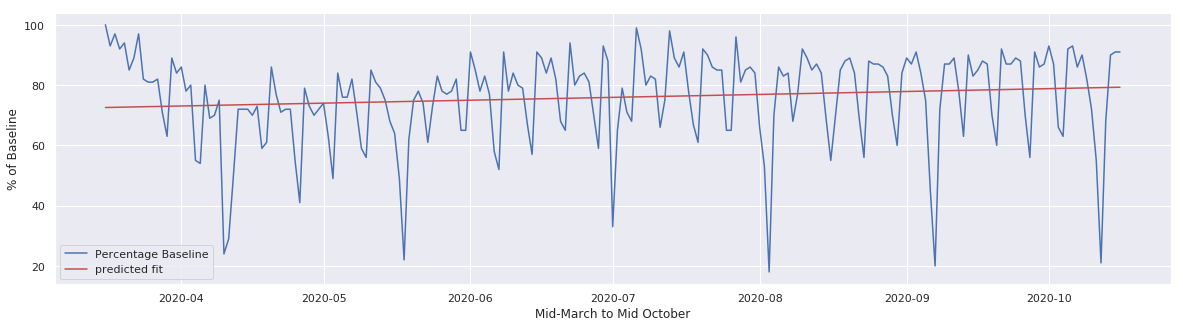

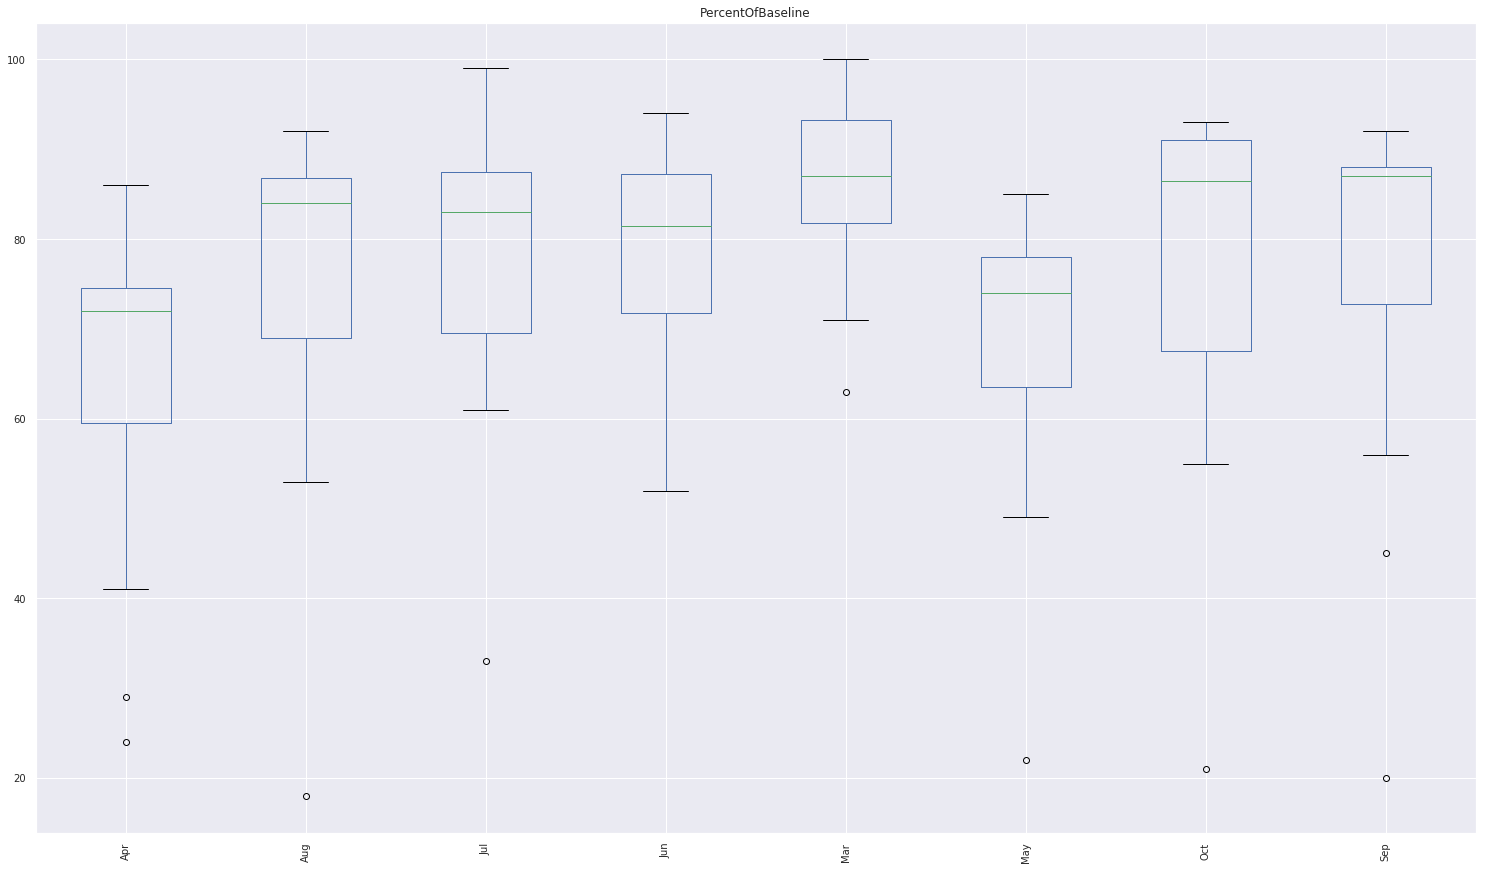

In [16]:
plt.figure(figsize = (20,5))
plt.plot(yvr["Date"], yvr['PercentOfBaseline'], 'b-', label = 'Percentage Baseline')
plt.plot(yvr["Date"], yvr["Prediction"], 'r-', label = 'predicted fit')
plt.xlabel("Mid-March to Mid October")
plt.ylabel("% of Baseline")
plt.legend()

yvr["Date"] = pd.to_datetime(yvr["Date"])
yvr.boxplot(column = ['PercentOfBaseline'], by = yvr['Date'].dt.strftime('%b'), rot = 90, fontsize = 10, figsize = (25,15))
plt.suptitle("")
plt.xlabel("")

In [17]:
# Looking for any correlation between percent of baseline in airport traffic & 
yvr["Month"] = yvr['Date'].dt.month_name()
yvr[yvr["Month"] == "April"]

,Date,AirportName,PercentOfBaseline,City,State,Country,lat,long,timestamp,Prediction,Month
16,2020-04-01,Vancouver International,86,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585699e+09,73.076266,April
17,2020-04-02,Vancouver International,78,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585786e+09,73.107701,April
18,2020-04-03,Vancouver International,80,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585872e+09,73.139135,April
19,2020-04-04,Vancouver International,55,Richmond,British Columbia,Canada,49.193579,-123.177541,1.585958e+09,73.170570,April
20,2020-04-05,Vancouver International,54,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586045e+09,73.202004,April
21,2020-04-06,Vancouver International,80,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586131e+09,73.233439,April
22,2020-04-07,Vancouver International,69,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586218e+09,73.264873,April
23,2020-04-08,Vancouver International,70,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586304e+09,73.296308,April
24,2020-04-09,Vancouver International,75,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586390e+09,73.327742,April
25,2020-04-10,Vancouver International,24,Richmond,British Columbia,Canada,49.193579,-123.177541,1.586477e+09,73.359177,April


In [19]:
%store yvr
yvr.to_csv('yvr4analyze_both.csv')

Stored 'yvr' (DataFrame)
